In [34]:
#making a list of all reviews
def combine_reviews(mypath):
    #calls method to make a list of file addresses for each review
    review_locations = find_locations(mypath)
    #calls method to make list of all reviews
    return make_list_of_reviews(mypath, review_locations)

In [35]:
# make a list of file addresses for each review
def find_locations(mypath):
    from os import listdir
    from os.path import isfile, join
    review_locations = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    return review_locations

In [36]:
#given a list of all review file addresses, makes a list of all reviews
def make_list_of_reviews(mypath, review_locations):
    reviews = []
    for file in review_locations:
        f = open(mypath + "/" + file,encoding='utf-8')
        current_review = f.read()
        #make lower case
        current_review = current_review.lower()
        #remove punctuation
        from string import punctuation
        current_review = ''.join([c for c in current_review if c not in punctuation])
        reviews.append(current_review)
        f.close()    
    return reviews

In [37]:
positive_train_reviews = combine_reviews("/Users/pugal/LeaseResearch/aclImdb/train/pos")

In [38]:
positive_train_reviews[0:3]

['bromwell high is a cartoon comedy it ran at the same time as some other programs about school life such as teachers my 35 years in the teaching profession lead me to believe that bromwell highs satire is much closer to reality than is teachers the scramble to survive financially the insightful students who can see right through their pathetic teachers pomp the pettiness of the whole situation all remind me of the schools i knew and their students when i saw the episode in which a student repeatedly tried to burn down the school i immediately recalled  at  high a classic line inspector im here to sack one of your teachers student welcome to bromwell high i expect that many adults of my age think that bromwell high is far fetched what a pity that it isnt',
 'homelessness or houselessness as george carlin stated has been an issue for years but never a plan to help those on the street that were once considered human who did everything from going to school work or vote for the matter most

In [ ]:
negative_train_reviews = combine_reviews("/Users/pugal/LeaseResearch/aclImdb/train/neg")
negative_train_reviews

In [40]:
negative_train_reviews[0:3]

['story of a man who has unnatural feelings for a pig starts out with a opening scene that is a terrific example of absurd comedy a formal orchestra audience is turned into an insane violent mob by the crazy chantings of its singers unfortunately it stays absurd the whole time with no general narrative eventually making it just too off putting even those from the era should be turned off the cryptic dialogue would make shakespeare seem easy to a third grader on a technical level its better than you might think with some good cinematography by future great vilmos zsigmond future stars sally kirkland and frederic forrest can be seen briefly',
 'airport 77 starts as a brand new luxury 747 plane is loaded up with valuable paintings  such belonging to rich businessman philip stevens james stewart who is flying them  a bunch of vips to his estate in preparation of it being opened to the public as a museum also on board is stevens daughter julie kathleen quinlan  her son the luxury jetliner t

In [41]:
all_train_reviews = positive_train_reviews+negative_train_reviews

In [42]:
all_train_reviews[0:3]

['bromwell high is a cartoon comedy it ran at the same time as some other programs about school life such as teachers my 35 years in the teaching profession lead me to believe that bromwell highs satire is much closer to reality than is teachers the scramble to survive financially the insightful students who can see right through their pathetic teachers pomp the pettiness of the whole situation all remind me of the schools i knew and their students when i saw the episode in which a student repeatedly tried to burn down the school i immediately recalled  at  high a classic line inspector im here to sack one of your teachers student welcome to bromwell high i expect that many adults of my age think that bromwell high is far fetched what a pity that it isnt',
 'homelessness or houselessness as george carlin stated has been an issue for years but never a plan to help those on the street that were once considered human who did everything from going to school work or vote for the matter most

In [43]:
print("Number of positive training reviews: ",len(positive_train_reviews))
print("Number of negative training reviews: ", len(negative_train_reviews))
print("Total number of training reviews: ", len(all_train_reviews))

Number of positive training reviews:  12500
Number of negative training reviews:  12500
Total number of training reviews:  25000


In [44]:
#encoding reviews
def encode_reviews(positive_reviews, negative_reviews):
    #combine negative and positive reviews into one lsit
    all_reviews = positive_reviews + negative_reviews
    sorted_words = sort_words_by_FreqDist(all_reviews)
    vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}
    reviews_int = encode_words_as_integers(all_reviews, vocab_to_int)
    return reviews_int

In [45]:
def sort_words_by_FreqDist(all_reviews):
    import nltk
    all_text2 = ''.join(all_reviews)
    words = all_text2.split()
    #make an freqDist object to count all word frequencies
    fd = nltk.FreqDist(words)
    #use freqDist object to make a dictionary of words ordered by word frequencies
    #len(words) ensures all words are ordered
    sorted_words = fd.most_common(len(words))
    return sorted_words    

In [46]:
def encode_words_as_integers(all_reviews, vocab_to_int):
    reviews_int = []
    for review in all_reviews:
        #for every word, find corresponding integer in vocab_to_int encoding
        r = [vocab_to_int[w] for w in review.split() if w in vocab_to_int]
        reviews_int.append(r)
    return reviews_int

In [47]:
def encode_labels(num_positive, num_negative):
    encoded_labels = []
    positive = 1
    negative = 0
    #recall first 12500 reviews in allreviews were positive
    #second 12500 reviews were negative
    for x in range(num_positive):
        encoded_labels.append(positive)
    for x in range(num_negative):
        encoded_labels.append(negative)
    return encoded_labels

In [48]:
#recall first 12500 reviews in allreviews were positive
# second 12500 reviews were negative
train_labels = encode_labels(12500, 12500)

In [ ]:
positive_train_reviews = combine_reviews("/Users/pugal/LeaseResearch/aclImdb/train/pos")
negative_train_reviews = combine_reviews("/Users/pugal/LeaseResearch/aclImdb/train/neg")
encoded_train_reviews = encode_reviews(positive_train_reviews, negative_train_reviews)
encoded_train_reviews

In [50]:
encoded_train_reviews[0:2]

[[24371,
  320,
  6,
  3,
  1079,
  220,
  8,
  2072,
  30,
  1,
  166,
  62,
  14,
  46,
  80,
  5722,
  42,
  399,
  119,
  135,
  14,
  4852,
  55,
  4947,
  147,
  7,
  1,
  4908,
  5992,
  474,
  69,
  5,
  253,
  11,
  24371,
  17221,
  1963,
  6,
  72,
  2356,
  5,
  632,
  70,
  6,
  4852,
  1,
  26417,
  5,
  2021,
  11069,
  1,
  5846,
  1422,
  35,
  68,
  67,
  206,
  140,
  64,
  1228,
  4852,
  21261,
  1,
  44658,
  4,
  1,
  214,
  901,
  31,
  2898,
  69,
  4,
  1,
  4668,
  10,
  661,
  2,
  64,
  1422,
  52,
  10,
  207,
  1,
  382,
  7,
  59,
  3,
  1470,
  3605,
  767,
  5,
  3555,
  187,
  1,
  399,
  10,
  1192,
  15181,
  30,
  320,
  3,
  353,
  361,
  2982,
  144,
  133,
  5,
  9212,
  28,
  4,
  122,
  4852,
  1470,
  2500,
  5,
  24371,
  320,
  10,
  510,
  11,
  104,
  1476,
  4,
  55,
  582,
  102,
  11,
  24371,
  320,
  6,
  231,
  8838,
  48,
  3,
  2305,
  11,
  8,
  203],
 [26421,
  40,
  59564,
  14,
  723,
  20113,
  3360,
  43,
  73,
  33,
  1845,

In [ ]:
positive_test_reviews = combine_reviews("/Users/pugal/LeaseResearch/aclImdb/test/pos")
negative_test_reviews = combine_reviews("/Users/pugal/LeaseResearch/aclImdb/test/neg")
encoded_test_reviews = encode_reviews(positive_test_reviews, negative_test_reviews)

In [52]:
encoded_test_reviews[0:2]

[[9,
  390,
  2,
  200,
  10,
  17,
  234,
  320,
  101,
  107,
  31818,
  5,
  32,
  3,
  166,
  326,
  4,
  1670,
  538,
  960,
  11,
  9,
  13,
  5909,
  5,
  61,
  8,
  83,
  35,
  48,
  9,
  619,
  4,
  8354,
  7792,
  27,
  13,
  62,
  445,
  5,
  79,
  208,
  9,
  13,
  359,
  7792,
  243,
  1,
  108,
  4,
  4082,
  18588,
  50,
  73,
  2,
  1416,
  6300,
  243,
  1564,
  10517,
  15,
  136,
  10801,
  1,
  2107,
  4,
  3,
  49,
  17,
  6,
  11,
  8,
  66,
  3410,
  15,
  249,
  1226,
  10,
  28,
  113,
  593,
  11,
  1,
  427,
  796,
  64,
  13,
  3013,
  43,
  13,
  3411,
  32,
  2253,
  286,
  1,
  89,
  331,
  4,
  1,
  17,
  2,
  65,
  1556,
  5,
  1731,
  286,
  1,
  336,
  331,
  135,
  11719,
  1,
  796,
  9,
  22,
  62,
  200,
  103,
  377,
  7,
  1731,
  18,
  103,
  361,
  2376,
  332,
  14,
  73,
  254,
  2818,
  22,
  5,
  367,
  239,
  61,
  91,
  2405,
  10,
  17,
  13,
  77,
  2,
  9,
  1417,
  11,
  21,
  140,
  61,
  8,
  157,
  21,
  1501],
 [300,
  644,
  172

In [53]:
print("Number of positive testing reviews: ",len(positive_test_reviews))
print("Number of negative testing reviews: ", len(negative_test_reviews))
#25000 reviews, but website says 25001
print("Total number of testing reviews: ", positive_test_reviews + negative_test_reviews)

Number of positive testing reviews:  12500
Number of negative testing reviews:  12500


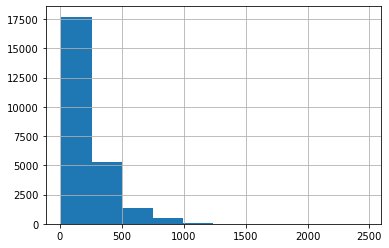

count    25000.000000
mean       232.841800
std        173.067376
min         10.000000
25%        126.000000
50%        174.000000
75%        283.000000
max       2469.000000
dtype: float64

In [54]:
#making histogram of number of words in each training review
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
encoded_train_reviews_len = [len(x) for x in encoded_train_reviews]
pd.Series(encoded_train_reviews_len).hist()
plt.show()
pd.Series(encoded_train_reviews_len).describe()    

In [55]:
encoded_train_reviews_len[0:3]

[138, 428, 147]

In [56]:
print("min isn't 0 so don't need to remove short reviews")

min isn't 0 so don't need to remove short reviews


In [57]:
#Step 9a: filter reviews
def filter_reviews(reviews_int, small_cutoff, large_cutoff, reviews_len):
    return [reviews_int[i] for i, l in enumerate(reviews_len) if l< large_cutoff and l > small_cutoff ]

In [58]:
#Step 9b: filter labels
def filter_labels(labels, small_cutoff, large_cutoff, reviews_len):
    return [labels[i] for i, l in enumerate(reviews_len) if l< large_cutoff and l > small_cutoff ]

In [59]:
#only have labels for reviews between 0 and 500 words
filtered_train_labels = filter_labels(train_labels, 0, 500, encoded_train_reviews_len)
print(filtered_train_labels[0:3])
print(len(filtered_train_labels))

[1, 1, 1]
22990


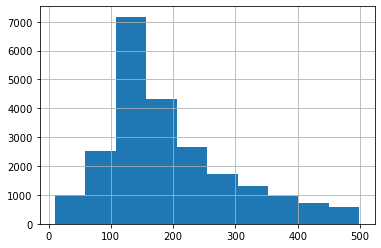

count    22990.000000
mean       193.002262
std        101.725504
min         10.000000
25%        124.000000
50%        164.000000
75%        245.000000
max        499.000000
dtype: float64

In [60]:
#only have reviews between 0 and 500 words
filtered_train_reviews = filter_reviews(encoded_train_reviews, 0, 500, encoded_train_reviews_len)
%matplotlib inline
filtered_train_reviews_len = [len(x) for x in filtered_train_reviews]
pd.Series(filtered_train_reviews_len).hist()
plt.show()
pd.Series(filtered_train_reviews_len).describe()  

In [61]:
#Step 10 Padding/Truncating the remaining data
def padding_truncating(reviews_int, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's or truncated to the input seq_length.
    '''
    import numpy as np
    features = np.zeros((len(reviews_int), seq_length), dtype = int)
    
    for i, review in enumerate(reviews_int):
        review_len = len(review)
        
        if review_len <= seq_length:
            zeroes = list(np.zeros(seq_length-review_len))
            new = zeroes+review
        elif review_len > seq_length:
            new = review[0:seq_length]
        
        features[i,:] = np.array(new)
    
    return features

In [62]:
final_encoded_training_data = padding_truncating(filtered_train_reviews,200)
final_encoded_training_data[0:3]

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0, 24371,
          320,     6,     3,  1079,   220,     8,  2072,    30,     1,
          166,    62,    14,    46,    80,  5722,    42,   399,   119,
          135,    14,  4852,    55,  4947,   147,     7,     1,  4908,
         5992,   474,    69,     5,   253,    11, 24371, 17221,  1963,
            6,    72,  2356,     5,   632,    70,     6,  4852,     1,
        26417,     5,  2021, 11069,     1,  5846,  1422,    35,    68,
           67,   206,   140,    64,  1228,  4852, 21261,     1, 44658,
      

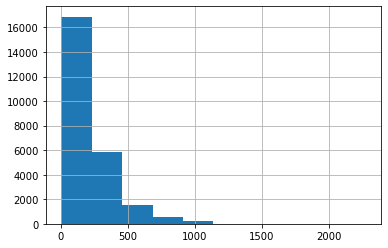

count    25000.000000
mean       227.609240
std        168.185625
min          4.000000
25%        125.000000
50%        171.000000
75%        276.000000
max       2272.000000
dtype: float64

In [63]:
# let's visualise the encoded test reviews
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
encoded_test_reviews_len = [len(x) for x in encoded_test_reviews]
pd.Series(encoded_test_reviews_len).hist()
plt.show()
pd.Series(encoded_test_reviews_len).describe()
#use similar cutoffs for encoded test reviews

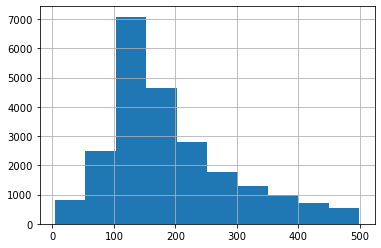

count    23120.000000
mean       190.499048
std        100.640815
min          4.000000
25%        123.000000
50%        163.000000
75%        240.000000
max        499.000000
dtype: float64

In [64]:
#only have test reviews between 0 and 500 words
filtered_test_reviews = filter_reviews(encoded_test_reviews, 0, 500, encoded_test_reviews_len)
%matplotlib inline
filtered_test_reviews_len = [len(x) for x in filtered_test_reviews]
pd.Series(filtered_test_reviews_len).hist()
plt.show()
pd.Series(filtered_test_reviews_len).describe()  

In [65]:
final_encoded_testing_data = padding_truncating(filtered_test_reviews,200)
final_encoded_testing_data[0:3]

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     9,   390,     2,   200,    10,    17,
          234,   320,   101,   107, 31818,     5,    32,     3,   166,
          326,     4,  1670,   538,   960,    11,     9,    13,  5909,
            5,    61,     8,    83,    35,    48,     9,   619,     4,
         8354,  7792,    27,    13,    62,   445,     5,    79,   208,
            9,    13,   359,  7792,   243,     1,   108,     4,  4082,
        18588,    50,    73,     2,  1416,  6300,   243,  1564, 10517,
           15,   136, 10801,     1,  2107,     4,     3,    49,    17,
            6,    11,     8,    66,  3410,    15,   249,  1226,    10,
      

In [66]:
#only have labels for reviews between 0 and 500 words
test_labels = encode_labels(12500, 12500)
filtered_test_labels = filter_labels(test_labels, 0, 500, encoded_test_reviews_len)
print(filtered_test_labels[0:3])
print(len(filtered_test_labels))

[1, 1, 1]
23120


In [67]:
#setting aside 20% of the training reviews to make a seperate list of 'valid' reviews
split_frac = 0.8
len_feat = len(final_encoded_training_data)
train_x = final_encoded_training_data[0:int(split_frac*len_feat)]
train_y = filtered_train_labels[0:int(split_frac*len_feat)]
valid_x = final_encoded_training_data[int(split_frac*len_feat):]
valid_y = filtered_train_labels[int(split_frac*len_feat):]

In [68]:
#Step 12 Dataloaders and Batching, adapted from article
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
# create Tensor datasets
#torch.from_numpy requires an array, so np.array used to transform list of labels into an array of labels
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(np.array(train_y)))
test_data = TensorDataset(torch.from_numpy(final_encoded_testing_data), torch.from_numpy(np.array(filtered_test_labels)))
valid_data = TensorDataset(torch.from_numpy(valid_x), torch.from_numpy(np.array(valid_y)))
# dataloaders
batch_size = 50
# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)

In [69]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()

In [70]:
#Step 14: Define LSTM class
import torch.nn as nn

class SentimentLSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super().__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()
        

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
    
        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        #if (train_on_gpu):
         #   hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
          #        weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        #else:
        hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                    weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())

In [71]:
def count_vocab(an_array):
    return sum(len(row) for row in an_array)

In [72]:
# Instantiate the network
# Instantiate the model w/ hyperparams
vocab_size = count_vocab(train_x)+1 # +1 for the 0 padding
output_size = 1
embedding_dim = 400
hidden_dim = 256
n_layers = 2
net = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(net)

SentimentLSTM(
  (embedding): Embedding(3678401, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [73]:
# loss and optimization functions
lr=0.001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)


# training params

epochs = 4 # 3-4 is approx where I noticed the validation loss stop decreasing

counter = 0
print_every = 100
clip=5 # gradient clipping

# move model to GPU, if available
#if(train_on_gpu):
    #net.cuda()

    
net.train()
# train for some number of epochs
for e in range(epochs):
    #how many times has the graph been backtraced?
    #temp = 0    
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        #if(train_on_gpu):
         #   inputs, labels = inputs.cuda(), labels.cuda()

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        #h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        inputs = inputs.type(torch.LongTensor)
        output, h = net(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                #if(train_on_gpu):
                    #inputs, labels = inputs.cuda(), labels.cuda()

                inputs = inputs.type(torch.LongTensor)
                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))

RuntimeError: Trying to backward through the graph a second time, but the saved intermediate results have already been freed. Specify retain_graph=True when calling backward the first time.

In [74]:
# loss and optimization functions
lr=0.001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)


# training params

epochs = 4 # 3-4 is approx where I noticed the validation loss stop decreasing

counter = 0
print_every = 100
clip=5 # gradient clipping

# move model to GPU, if available
#if(train_on_gpu):
    #net.cuda()

    
net.train()
# train for some number of epochs
for e in range(epochs):
    #how many times has the graph been backtraced?
    temp = 0    
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        #if(train_on_gpu):
         #   inputs, labels = inputs.cuda(), labels.cuda()

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        #h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        inputs = inputs.type(torch.LongTensor)
        output, h = net(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        if temp == 1:
            loss.backward()
        else:
            loss.backward(retain_graph=True)
            temp = 1
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                #if(train_on_gpu):
                    #inputs, labels = inputs.cuda(), labels.cuda()

                inputs = inputs.type(torch.LongTensor)
                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))

KeyboardInterrupt: 